In [8]:
using DataStructures
using Dates
using BenchmarkTools
using Statistics

include("graph.jl")
include("prim.jl")
include("kruskal.jl")
include("utils.jl")

ArgumentError: ArgumentError: Package Distributions not found in current path.
- Run `import Pkg; Pkg.add("Distributions")` to install the Distributions package.

In [2]:
nMin = 100
nMax = 1000
step = 10
reps = 10

N = [n for n in nMin:step:nMax]

struct Record
    n::Int
    time::Float64
    weight::Float64
end

recordsPrimUni = Vector{Vector{Record}}()
recordsKruskalUni = Vector{Vector{Record}}()

recordsPrimMy = Vector{Vector{Record}}()
recordsKruskalMy = Vector{Vector{Record}}()

for n in N
    println(n)
    primVectUni = Vector{Record}()
    kruskalVectUni = Vector{Record}()
    primVectMy = Vector{Record}()
    kruskalVectMy = Vector{Record}()
    for _ in 1:reps
        gUni = genGraph(n, rand)
        gMy = genGraph(n, myDist)
        time = @elapsed t = prim(gUni)
        push!(primVectUni, Record(n, time, getTreeWeight(t)))

        time = @elapsed t = prim(gUni)
        push!(kruskalVectUni, Record(n, time, getTreeWeight(t)))

        time = @elapsed t = prim(gMy)
        push!(primVectMy, Record(n, time, getTreeWeight(t)))

        time = @elapsed t = prim(gMy)
        push!(kruskalVectMy, Record(n, time, getTreeWeight(t)))
    end
    push!(recordsPrimUni, primVectUni)
    push!(recordsKruskalUni, kruskalVectUni)
    push!(recordsPrimMy, primVectMy)
    push!(recordsKruskalMy, kruskalVectMy)
end

100
110


120


130


140


150


160


170


180


190


200


210


220


230


240


250


260


270


280


290


300


310


320


330


340


350


360


370


380


390


400


410


420


430


440


450


460


470


480


490


500


510


520


530


540


550


560


570


580


590


600


610


620


630


640


650


660


670


680


690


700


710


720


730


740


750


760


770


780


790


800


810


820


830


840


850


860


870


880


890


900


910


920


930


940


950


960


970


980


990


1000


In [13]:
using Distributions

function getTimes(records)
    times = [r.time for r in records]
    minTime = minimum(times)
    maxTime = maximum(times)
    avg = mean(times)
    kurt = kurtosis(times)

    return (minTime, maxTime, avg, kurt)
end

timesPrimUni = [getTimes(recordsPrimUni[i]) for i in 1:length(N)]
timesKruskalUni = [getTimes(recordsKruskalUni[i]) for i in 1:length(N)]
timesPrimMy = [getTimes(recordsPrimMy[i]) for i in 1:length(N)]
timesKruskalMy = [getTimes(recordsKruskalMy[i]) for i in 1:length(N)]

91-element Vector{NTuple{4, Float64}}:
 (0.0012873, 0.0100042, 0.0022270199999999997, 5.1069232524529955)
 (0.0015054, 0.0019156, 0.00162026, 1.0139941664840313)
 (0.0018039, 0.001953, 0.00186727, -1.6024348786199296)
 (0.0020521, 0.0074374, 0.0026980499999999996, 5.079039355740589)
 (0.0024223, 0.0026409, 0.0025309799999999995, -1.4295756571603)
 (0.0027987, 0.0055152, 0.0035004199999999993, 3.344910996486572)
 (0.003659, 0.0066693, 0.00406837, 4.830909188767738)
 (0.0040148, 0.0075456, 0.00452168, 4.9164180629396155)
 (0.0044673, 0.0077734, 0.0049597, 4.7395869017221655)
 (0.0047947, 0.0077962, 0.00533584, 4.5783674835943255)
 ⋮
 (0.1684981, 0.1730558, 0.17059834000000001, -1.6546493207596185)
 (0.1727012, 0.1776183, 0.17434731999999997, -0.47434837948141695)
 (0.1771027, 0.1979288, 0.18190260000000003, 3.240556178284823)
 (0.1803572, 0.1970503, 0.18828958, -1.227404435305409)
 (0.1850128, 0.1971415, 0.18973318, -0.3766009701074746)
 (0.1874367, 0.1933367, 0.19028438999999997, -0.879

### Minimum time plot

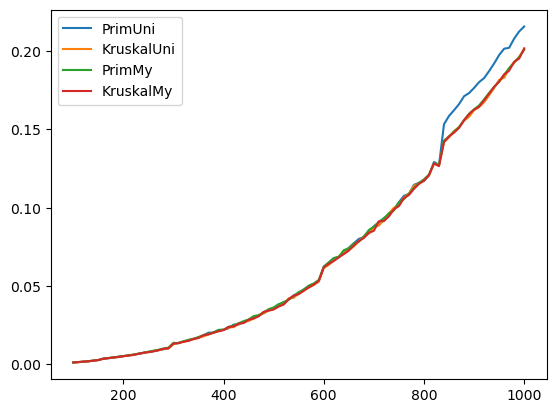

In [14]:
using PyPlot

plot(N,[t[1] for t in timesPrimUni], label="PrimUni")
plot(N,[t[1] for t in timesKruskalUni], label="KruskalUni")
plot(N,[t[1] for t in timesPrimMy], label="PrimMy")
plot(N,[t[1] for t in timesKruskalMy], label="KruskalMy")
legend()
display(gcf())
clf()

### Maximum time plot

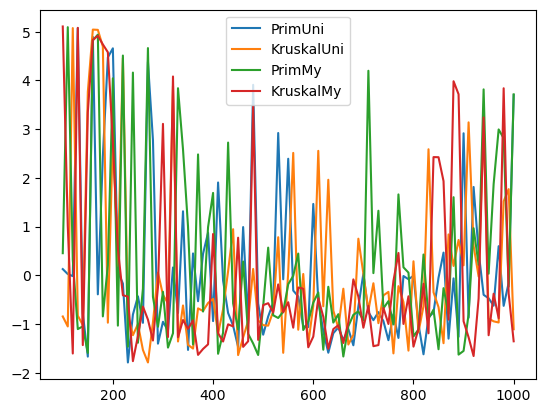

In [15]:
plot(N,[t[2] for t in timesPrimUni], label="PrimUni")
plot(N,[t[2] for t in timesKruskalUni], label="KruskalUni")
plot(N,[t[2] for t in timesPrimMy], label="PrimMy")
plot(N,[t[2] for t in timesKruskalMy], label="KruskalMy")
legend()
display(gcf())
clf()

### Average time plot

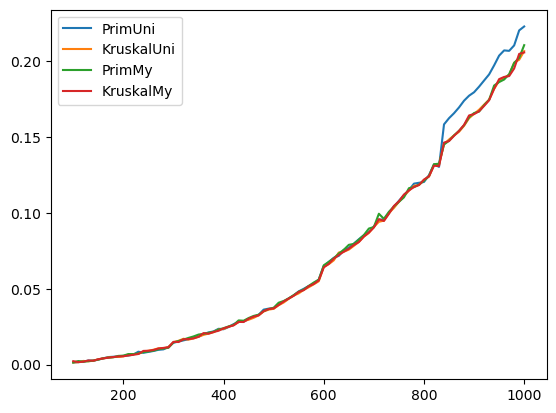

In [16]:
plot(N,[t[3] for t in timesPrimUni], label="PrimUni")
plot(N,[t[3] for t in timesKruskalUni], label="KruskalUni")
plot(N,[t[3] for t in timesPrimMy], label="PrimMy")
plot(N,[t[3] for t in timesKruskalMy], label="KruskalMy")
legend()
display(gcf())
clf()